## Experiment 4 : Estimation of channel frequency response in an 802.11ax SISO-OFDM channel​


### *1. Learning objectives*

• BPSK modulated populated sub-carriers of L-LTF field of packet preamble 

• Estimation of channel frequency response (CFR), |Hi| using wlanLLTFChannelEstimate

• Least Squares (LS) estimation of CFR over L-LTF subcarriers

• DFT of Actual Channel impulse response plot

• Comparing CFR obtained in all three methods.

Note: This experiment is a comprehensive WLAN channel modeling and estimation example, combining theoretical channel estimation and practical verification via WLAN Toolbox


### *2. Theory*

#### • Orthogonal Frequency Division Multiplexing (OFDM)

OFDM is a widely used digital modulation technique in modern wireless communication systems, especially in high data rate applications like WiFi, LTE, and 5G. It divides a high-data-rate signal into multiple lower data-rate sub-signals that are transmitted simultaneously over several orthogonal subcarriers. This division allows for more efficient use of the spectrum and robustness against multipath fading and also helps us to tackle ISI (Inter Symbol Interference).

**Key Concepts of OFDM**
1. **Orthogonality of Subcarriers**
   - In OFDM, multiple closely spaced carrier frequencies (subcarriers) are used, but they remain orthogonal to each other. This orthogonality ensures that the subcarriers do not interfere with each other, even though they overlap in frequency
   - Mathematically, if the subcarriers are separated by $\Delta f$ such that $\Delta f = 1/T$ (where $T$ is the symbol duration), each subcarrier frequency $f_n$ is given by $f_n = f_0 + n\Delta f$. $f_0$ is the central carrier frequency.
   - This ensures that the integral product of any two subcarriers over a symbol period $T$ is zero (orthogonality).
2. **IFFT and FFT Processing**
   - OFDM uses the Inverse Fast Fourier Transform (IFFT) at the transmitter to convert frequency-domain data into the time-domain signal, enabling simultaneous transmission across all subcarriers
   - At the receiver, the Fast Fourier Transform (FFT) is applied to recover the original data from the received multicarrier signal.
3. **Guard Interval and Cyclic Prefix**
   - A cyclic prefix (CP) is added to each OFDM symbol to mitigate Inter-Symbol Interference (ISI) from multipath propagation.
   - The CP is a copy of the end part of the OFDM symbol appended to its beginning. It acts as a buffer zone, absorbing any reflections that arrive late.

<figure>
<img src="expt4_OFDM_Blk_diag.png" style="width:50%">
<figcaption align = "center"> Block Diagram of OFDM Transmitter and Receiver Chain </figcaption>
</figure>

**Mathematical Representation of OFDM Transmission**
Suppose we have 
𝑁 subcarriers, and each subcarrier transmits a symbol 
𝑋[𝑛] from a modulation scheme like QAM. The transmitted OFDM signal 𝑥(𝑡)
in the time domain can be expressed as:
1. **Frequency-Domain Representation**
   $X[n]={X[0],X[1],.......,X[N-1]}$
   where $X[n]$ represents the data symbol on the $n^{th}$ subcarrier.
2. **Time-Domain Signal Generation using IFFT**
   - To generate the time-domain signal of transmission, we take IFFT of $X[n]$.
      $x[k] = \frac{1}{\sqrt{N}} \sum_{n=0}^{N-1} X[n]e^{j2\pi nk/N}, k=0,1,.....N-1$
   - This time-domain signal $x[k]$ is the OFDM symbol that contains the contribution of each subcarrier.
3. **Adding the Cyclic Prefix**
   - Let $L$ be the length of the cyclic prefix. The cyclic prefix is created by taking the last $L$ samples of the OFDM symbol and appending them at the start of the symbol.
      $x_{CP}[k] =  x[N-L+k],  k=0,1,.....L-1$
4. **Received Signal and FFT**
   - After passing through a channel with impulse response $h(t)$ and adding noise $w(t)$, the received signal $y(t)$ is processesd by the FFT:
     $Y[n] = H[n]X[n]+W[n]$
   - Here, $H[n]$ is the CFR ar subcarrier $n$, and $W[n]$ represents the noise in the frequency domain.
   - Now, we can show that $W[n]$'s are uncorrelated (and also independent), which means we will get a kind of orthogonal AWGN channels (in frequency domain) for $n=0,1,......N$, which can be easily decoded with traditional ML Decoder after channel equalizataion.



#### • Long Training field (L-LTF)


Channel estimation in WLAN systems like 802.11ax often uses training sequences sent within the transmitted waveform to estimate the characteristics of the wireless channel. One common method involves the Legacy Long Training Field (L-LTF), which is part of the preamble sent at the beginning of each packet in 802.11 standards, including 802.11ax. Here’s an overview of how channel estimation is done using the L-LTF

<figure>
<img src="expt4_L_LTF.png" style="width:50%">
<figcaption align = "center"> L-LTF field of 802.11ax packet </figcaption>
</figure>

1. **Purpose of the L-LTF**
   - The L-LTF provides a known reference sequence to the receiver, which helps it estimate the impact of the channel on the transmitted signal
   - It is designed to be robust to various impairments like fading, multipath interference, and noise, typical in wireless environments
2. **Structure of the L-LTF**
   - The L-LTF consists of two identical, repeated OFDM symbols with a known structure and predefined data (i.e., they contain the same sequence of subcarrier values)
   - This known repetition allows the receiver to differentiate the L-LTF from other fields in the signal and to leverage the repetitive structure for estimation
3. **Channel Estimation using the L-LTF**
   - Receive the Signal: The receiver captures the transmitted L-LTF, which has been distorted by the channel’s effects
   - FFT Processing: The received L-LTF symbols are processed through the Fast Fourier Transform (FFT), transforming them from the time domain to the frequency domain. This conversion is necessary because OFDM signals operate on multiple subcarriers in the frequency domain
   - Known vs. Received Values: In the frequency domain, the receiver knows the expected values for each subcarrier based on the pre-defined structure of the L-LTF. The received subcarrier values are then compared to the expected values, allowing the receiver to estimate the channel's response across the subcarriers
   - Channel Response Calculation: The channel response H(f) on each subcarrier can be calculated by deividing the received L-LTF subcarrier values Y(f) by the known transmitted values X(f) as H(f) = Y(f)/X(f).
   - Average and Smooth Channel REsponse: Since the L-LTF consists of two identical OFDM symbols, the receiver averages the estimates from each symbol. This averaging improves the accuracy of the estimate and reduces the impact of noise
4. **Applying the Channel Estimate**
   - Once the channel response H(f) is estimated across the subcarriers, the receiver can use this information to equalize the channel effects on the rest of the packet
   - In other words, the channel estimate allows the receiver to reverse or mitigate the channel distortion, improving the accuracy of data demodulation
5. **Advantages of Using the L-LTF for Channel Estimation**
   - The L-LTF-based method is relatively simple and effective for moderate mobility environments, as it captures a snapshot of the channel response at the beginning of each packet
   - Since the L-LTF is part of the 802.11 standard preamble, it ensures backward compatibility with legacy systems, making it versatile for use across different WLAN devices and standards (e.g., 802.11a/g/n/ac/ax)


### *3. Results*

<img src="expt4_fig1.png" style="width:500px;height:400px" title="Channel Impulse response model D"/>

<img src="expt4_fig2.png" style="width:600px;height:500px" title="Estimated CFRs"/>

### *4. Code*

<h3> Configuration and Initialization </h3>

In [1]:
%  LS estimation of CFR over LLTF subcarriers coded on 16/10/2019
clc;close all;clear all;
% Create the HE packet configuration and transmit waveform.
cfgSU = wlanHESUConfig; %wlanHESUConfig creates a single user (SU) high efficiency (HE)format configuration object. This object contains the transmit
%parameters for the HE-SU format of IEEE P802.11ax/D3.1 standard.
cfgSU.ChannelBandwidth='CBW20';
cfgSU.MCS = 8;   %256 QAM Modulation and coding rate = 3/4. Applicable only for user data. Not to preamble
cfgSU.HELTFType =1;
cfgSU.GuardInterval = 0.8;
cfgSU.APEPLength=0;% Data field carry PSDU's. Specify PSDU length
fs = wlanSampleRate(cfgSU); % Get baseband sample rate% 20MHz=BW
disp(cfgSU)

chanBW = cfgSU.ChannelBandwidth;%default 20MHz channel
psdu = randi([0 1], getPSDULength(cfgSU)*8, 1); % Create a PSDU, getPSDULength(cfgSU)=100 bytes
txWaveform = wlanWaveformGenerator(psdu,cfgSU,'WindowTransitionTime',0); % Disable windowing);
%Produce a waveform containing an 802.11ax HE single user packet 
%WAVEFORM is a complex Ns-by-Nt matrix 

ind = wlanFieldIndices(cfgSU);
LLTF_transmitted = txWaveform((ind.LLTF(1):ind.LLTF(2)), :);

  wlanHESUConfig with properties:

       ChannelBandwidth: 'CBW20'
          ExtendedRange: 0
    NumTransmitAntennas: 1
    NumSpaceTimeStreams: 1
         SpatialMapping: 'Direct'
    PreHESpatialMapping: 0
                   STBC: 0
                    MCS: 8
                    DCM: 0
          ChannelCoding: 'LDPC'
             APEPLength: 0
          GuardInterval: 0.8000
              HELTFType: 1
       UplinkIndication: 0
               BSSColor: 0
           SpatialReuse: 0
           TXOPDuration: 127
            HighDoppler: 0



**This section clears the workspace and sets up the 802.11ax High Efficiency Single User (HE-SU) packet configuration using the WLAN System Toolbox. Key parameters include:**
- *Channel Bandwidth* = 20 MHz
- *MCS* = Modulation and Coding Scheme (set to 8, indicating 256-QAM)
- *HELTFType* : Type 1 High Efficiency Long Training Field (HE-LTF)
- *Guard Interval* : 0.8 us
- *APEPLength* : Set to 0, indicating no payload data for this     configuration. The sample rate fs is obtained from the configuration and displayed.
- Generates a random **Physical Layer Service Data Unit** (PSDU) bit sequence based on the length required for the configuration.
- We create the transmit waveform *txWaveform* using *wlanWaveformGenerator*. The L-LTF portion of the waveform us extracted for channel estimation process.<br>
  

<h3>Configuring the TGax channel</h3>

In [23]:
% Configure a TGax channel with 20 MHz bandwidth.
tgax = wlanTGaxChannel('ChannelBandwidth','CBW20');
tgax.EnvironmentalSpeed=0;
tgax.CarrierFrequency=2.4e9;
tgax.LargeScaleFadingEffect = 'PathLoss and shadowing';    
tgax.NumPenetratedWalls = 2 ;%Number of walls between transmitter and receiver. Accounts for the wall penetration loss in the path loss calculation.
tgax.WallPenetrationLoss = 5; % penetration loss of a single wall in dB
 tgax.RandomStream = 'mt19937ar with seed';% source of the random number stream. mt19937ar alogorithm generates normally distributed random numbers.
 tgax.Seed = 10;% initial seed of the random number stream
 tgax.SampleRate = 100e6;%%%%%% Do not change this sample rate. For < 100e6, pathgains 1st row dont match to tgax(impulse input)
 tgax.PathGainsOutputPort = true;
tgax.DelayProfile='Model-D';%Delay profile model is Model-D
tgax.ChannelBandwidth='CBW20';
tgax.TransmitReceiveDistance=10;% in meters, breakpoint distance that obeys freespace pathloss model for Model B is 5m
disp(tgax)


  wlanTGaxChannel with properties:

                 SampleRate: 100000000
               DelayProfile: 'Model-D'
           ChannelBandwidth: 'CBW20'
           CarrierFrequency: 2.4000e+09
         EnvironmentalSpeed: 0
    TransmitReceiveDistance: 10
         NormalizePathGains: true
                  UserIndex: 0
      TransmissionDirection: 'Downlink'
        NumTransmitAntennas: 1
         NumReceiveAntennas: 1
     LargeScaleFadingEffect: 'Pathloss and shadowing'
        NumPenetratedFloors: 0
         NumPenetratedWalls: 2
        WallPenetrationLoss: 5
          FluorescentEffect: true
         PowerLineFrequency: '60Hz'
    NormalizeChannelOutputs: true
           ChannelFiltering: true

  Use get to show all properties



**This block configures the TGax channel model to simulate a multiplath fading environment**
- *ChannelBandwidth* : Set to 20 MHz
- *CarrierFrequency* : 2.4 GHz
- *LargeScaleFadingEffect* : Both path loss and shadowing included
- *NumPenetratedWalls* and *WallPenetrationLoss*: Settings for modeling wall penetration loss
- *RandomStream* and *Seed*: Set the random generator for repeatability
- *SampleRate*: Set to 100 MHz
- *DelayProfile*: Model-D, which is a multipath profile suitable for indoor scenarios
- *TransmitReceiveDistance*: Set to 10 meters
  

<h3>Transmit Signal through Channel, Retrieve Path Gains and Plot Channel Impulse Response</h3>

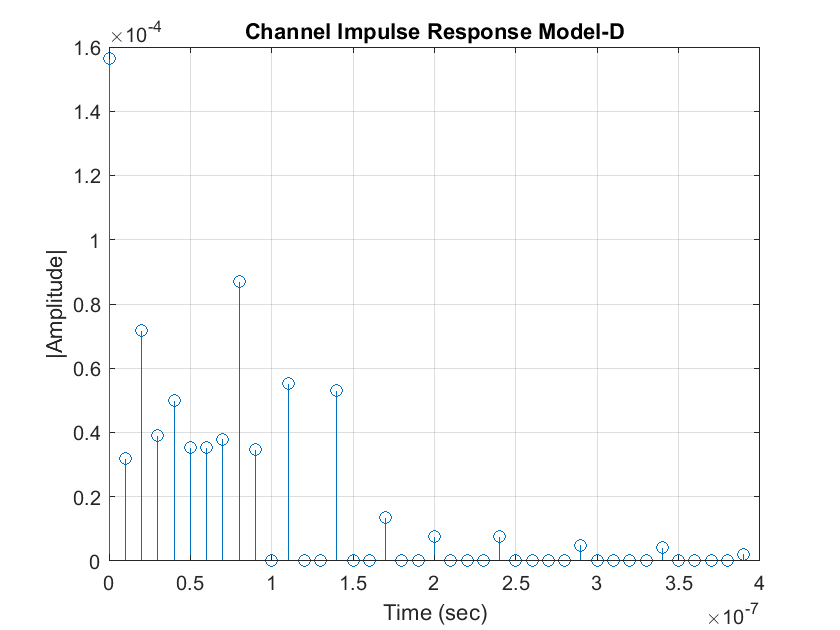

In [24]:
% Pass through a fading indoor TGax channel
[tgax_output,pathgains] = tgax(txWaveform);%% note Pathgains are independent of the input signal(values or the number of samples Ns) and depends only on the propagation MOdel:
reset(tgax); % Reset channel for different realization

info_tgax = info(tgax);
% The PathDelays provides the delay in seconds of each path (non-zero)
nonZeroTapIdx = round(info_tgax.PathDelays*tgax.SampleRate)+1;
% ChannelFilterCoefficients is an Np-by-Nh where Nh is the number of
% impulse response samples. This gives us the length of the channel impulse response.
% Create the channel impulse response by setting non-zero paths to the path
% gains returned by the channel
Nh = size(info_tgax.ChannelFilterCoefficients,2);
impr = zeros(Nh,1);
impr(nonZeroTapIdx) = pathgains(1,:);

figure(1)
time = (1/tgax.SampleRate)*(0:length(impr)-1);
stem(time,abs(impr));grid on;
xlabel('Time (sec)');
ylabel('|Amplitude|');
title('Channel Impulse Response Model-D'); 

- *tgax_output*: Output of the channel after passing txWaveform through it
- *pathgains*: Path gains for each multipath component
- *nonZeroTapIdx*: Indices corresponding to non-zero taps (delays)
- *impr*: Stores the channel impulse response by setting non-zero paths to the path gains
-  The channel impulse response is plotted, showing the amplitude vs. time for the Model-D channel profile.

<h3>Retrieve and Process the Received L-LTF Field</h3>

In [25]:
rxWaveform=tgax_output;

idxLLTF = wlanFieldIndices(cfgSU,'L-LTF');
LLTF_rx=rxWaveform(idxLLTF(1):idxLLTF(2),:);%Time domain received samples %LLTF_rx=rxWaveform(161:320)
a=[ LLTF_rx(33:96) LLTF_rx(97:160)]
LLTF_rx_discardCP=LLTF_rx(33:160); %without CP

lltfDemod = wlanHEDemodulate(LLTF_rx,'L-LTF',cfgSU);%lltfDemod is 52 X 2
%  SYM = wlanHEDemodulate(RX,FIELDNAME,CFG) demodulates the time-domain
%   received time-domain signal RX (Ns-by-Nr) using OFDM demodulation parameters appropriate for the specified FIELDNAME.


a = 
   1.0e-03 *

  -0.1746 - 0.1069i  -0.1777 - 0.0997i
  -0.3829 - 0.0613i  -0.3910 - 0.0617i
  -0.0362 - 0.1928i  -0.0403 - 0.1941i
   0.3434 - 0.0309i   0.3427 - 0.0308i
   0.0262 - 0.0706i   0.0258 - 0.0691i
  -0.1658 + 0.0139i  -0.1639 + 0.0107i
  -0.2302 + 0.1917i  -0.2261 + 0.1912i
  -0.0657 - 0.1928i  -0.0657 - 0.1928i
   0.1496 - 0.1374i   0.1496 - 0.1374i
   0.0238 - 0.0527i   0.0238 - 0.0527i
  -0.0825 + 0.1256i  -0.0825 + 0.1256i
  -0.2285 + 0.2918i  -0.2285 + 0.2918i
  -0.0201 - 0.2582i  -0.0201 - 0.2582i
   0.1835 - 0.1625i   0.1835 - 0.1625i
   0.1280 + 0.1278i   0.1280 + 0.1278i
   0.1850 - 0.0240i   0.1850 - 0.0240i
  -0.0918 - 0.0709i  -0.0918 - 0.0709i
   0.0333 - 0.0762i   0.0333 - 0.0762i
   0.2291 + 0.1684i   0.2291 + 0.1684i
  -0.0432 + 0.1938i  -0.0432 + 0.1938i
   0.1940 + 0.0627i   0.1940 + 0.0627i
   0.1689 - 0.0154i   0.1689 - 0.0154i
  -0.0981 + 0.0107i  -0.0981 + 0.0107i
  -0.0716 + 0.2138i  -0.0716 + 0.2138i
  -0.2967 + 0.0220i  -0.2967 + 0.0220i
  -0.2596 + 0.1689i  -0.2596 + 0.1689i
  -0.0286 + 0.2309i  -0.0286 + 0.2309i
  -0.0238 - 0.2999i  -0.0238 - 0.2999i
  -0.0032 - 0.0418i  -0.0032 - 0.0418i
   0.0056 + 0.1950i   0.0056 + 0.1950i
  -0.0029 - 0.2516i  -0.0029 - 0.2516i
   0.0060 - 0.1553i   0.0060 - 0.1553i
  -0.0293 + 0.3213i  -0.0293 + 0.3213i
  -0.0509 - 0.0510i  -0.0509 - 0.0510i
   0.0386 - 0.4590i   0.0386 - 0.4590i
  -0.0290 + 0.1438i  -0.0290 + 0.1438i
   0.0002 + 0.0994i   0.0002 + 0.0994i
   0.1910 - 0.2717i   0.1910 - 0.2717i
  -0.1340 + 0.2187i  -0.1340 + 0.2187i
  -0.1761 + 0.2220i  -0.1761 + 0.2220i
   0.2296 - 0.1411i   0.2296 - 0.1411i
  -0.0150 - 0.0004i  -0.0150 - 0.0004i
  -0.2359 + 0.1905i  -0.2359 + 0.1905i
   0.1084 - 0.1044i   0.1084 - 0.1044i
   0.1109 - 0.2220i   0.1109 - 0.2220i
  -0.1829 + 0.2461i  -0.1829 + 0.2461i
  -0.0272 + 0.1101i  -0.0272 + 0.1101i
   0.0233 - 0.2901i   0.0233 - 0.2901i
  -0.0700 - 0.1888i  -0.0700 - 0.1888i
   0.1062 - 0.0851i   0.1062 - 0.0851i
  -0.1413 - 0.1126i  -0.1413 - 0.1126i
  -0.1223 - 0.1086i  -0.1223 - 0.1086i
   0.2395 + 0.0902i   0.2395 + 0.0902i
   0.1031 + 0.1239i   0.1031 + 0.1239i
   0.2177 + 0.0806i   0.2177 + 0.0806i
   0.2213 - 0.0231i   0.2213 - 0.0231i
   0.0021 - 0.1684i   0.0021 - 0.1684i
   0.0985 + 0.2187i   0.0985 + 0.2187i
   0.0640 + 0.2759i   0.0640 + 0.2759i
  -0.0120 + 0.1057i  -0.0120 + 0.1057i
  -0.1335 + 0.0585i  -0.1335 + 0.0585i
  -0.0275 - 0.2105i  -0.0275 - 0.2105i
   0.2102 + 0.0303i   0.2102 + 0.0303i
   0.0622 + 0.0820i   0.0622 + 0.0820i

- *rxWaveform*: Received waveform after channel distortion
- *LLTF_rx*: Received L-LTF field
- *LLTF_rx_discardCP*: Received L-LTF field without the cyclic prefix
- *lltfDemod*: Frequency-domain demodulated L-LTF signal for channel estimation

<h3>Channel Estimation Using WLAN Toolbox</h3>

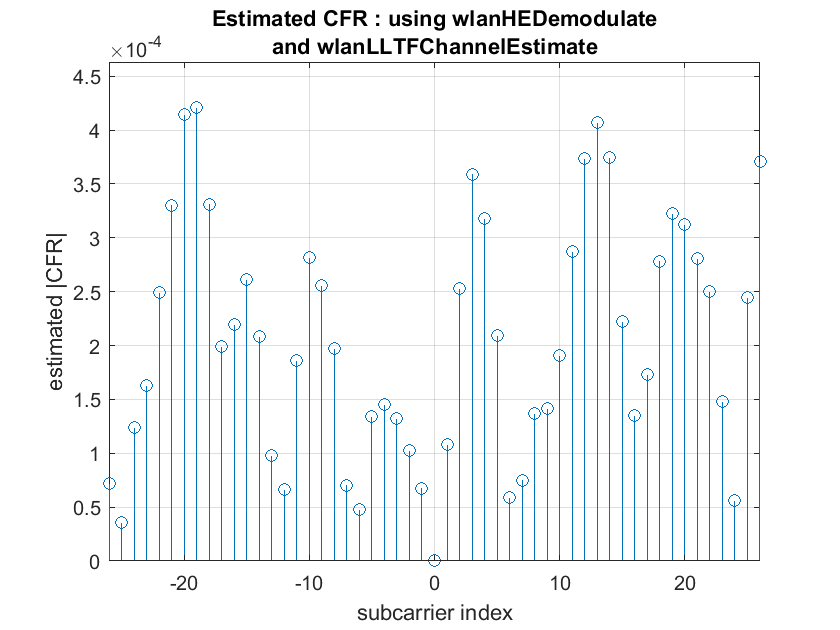

In [26]:
%%%%ESTIMATION of CHANNEL EVERY SUB-CARRIER using wlan L-LTF Channel Estimate
figure(2)
est = wlanLLTFChannelEstimate(lltfDemod,chanBW);
est=[est(1:26).' zeros(1,1) est(27:52).'];
kk=[-26:26];
stem(kk,abs(est));
M1=max(abs(est))+0.1*max(abs(est));
axis([-26 26 0 M1]);grid on;
xlabel('subcarrier index');
ylabel('estimated |CFR|');
title("Estimated CFR : using wlanHEDemodulate"+ newline  + "and wlanLLTFChannelEstimate")

The above block performs channel estimation using the built-in wlanLLTFChannelEstimate function, which returns an estimated Channel Frequency Response (CFR) for each subcarrier. The result is then plotted

<h3>Least square Channel Estimation</h3>

In [27]:
yk=lltfDemod (:,1);%%%%%%%% here yk is 52 X 1 obtained from 160X1 rx samples

lltfLower = [1; 1;-1;-1; ...
        1; 1;-1; 1; ...
        -1; 1; 1; 1; ...
        1; 1; 1;-1; ...
        -1; 1; 1;-1; ...
        1;-1; 1; 1; ...
        1; 1;];
    lltfUpper = [1; ...
           -1;-1; 1; 1; ...
           -1; 1;-1; 1; ...
           -1;-1;-1;-1; ...
           -1; 1; 1;-1; ...
           -1; 1;-1; 1; ...
           -1; 1; 1; 1; 1];   %has 52 populated subcarriers before performing IFFT

LLTF_BPSK = [zeros(6,1); lltfLower; 0; lltfUpper; zeros(5,1)]; %length=64
Lk=LLTF_BPSK.';  

Lkk=[lltfLower' lltfUpper']
for k=1:52
estimated_hk(k)= yk(k)/Lkk(k); % estimated CFR
end
estimated_hk=[estimated_hk(1:26) zeros(1,1) estimated_hk(27:52)];


Lkk = 1x52 double
     1     1    -1    -1     1     1    -1     1    -1     1     1     1     1     1     1    -1    -1     1     1    -1     1    -1     1     1     1     1     1    -1    -1     1
...

This part estimates the channel manually by dividing the received symbol yk by known transmitted L-LTF symbols for each subcarrier. This approach provides a direct estimation of the CFR, which is then stored in estimated_hk



<h3>Plotting the estimates obtained from Least square (LS) channel Estimation</h3>

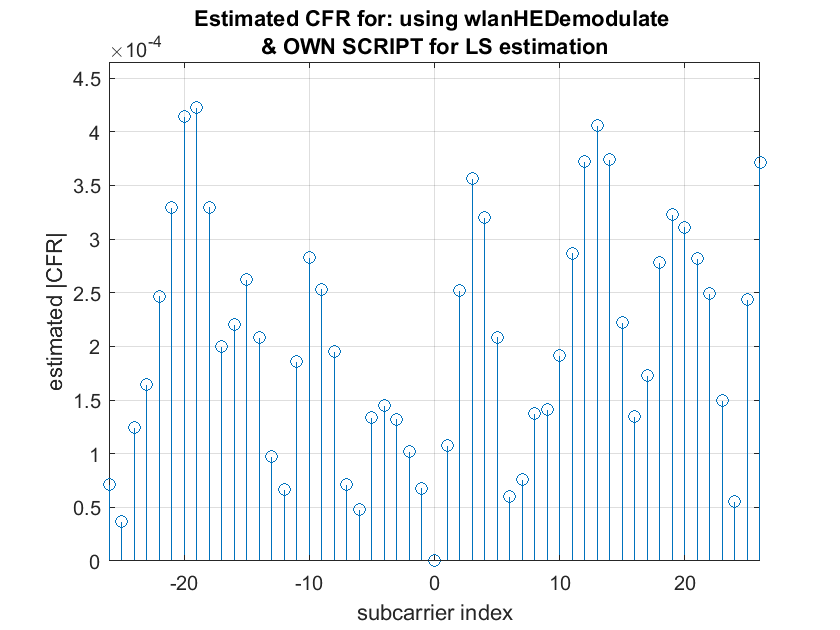

In [28]:
kk=[-26:26];
figure(3)
stem(kk,abs(estimated_hk));
M1=1.1*max(abs(estimated_hk));
axis([-26 26 0 M1]);
grid on; title("Estimated CFR for: using wlanHEDemodulate " + newline  + "& OWN SCRIPT for LS estimation")
xlabel('subcarrier index');
ylabel('estimated |CFR|');


This block visualizes the Least Squares estimated CFR.

<h3>True CFR Computation and Plotting</h3>

This block computes the true CFR by taking the FFT of the impulse response, which represents the true CFR, and plots it for comparison against the estimated CFRs.



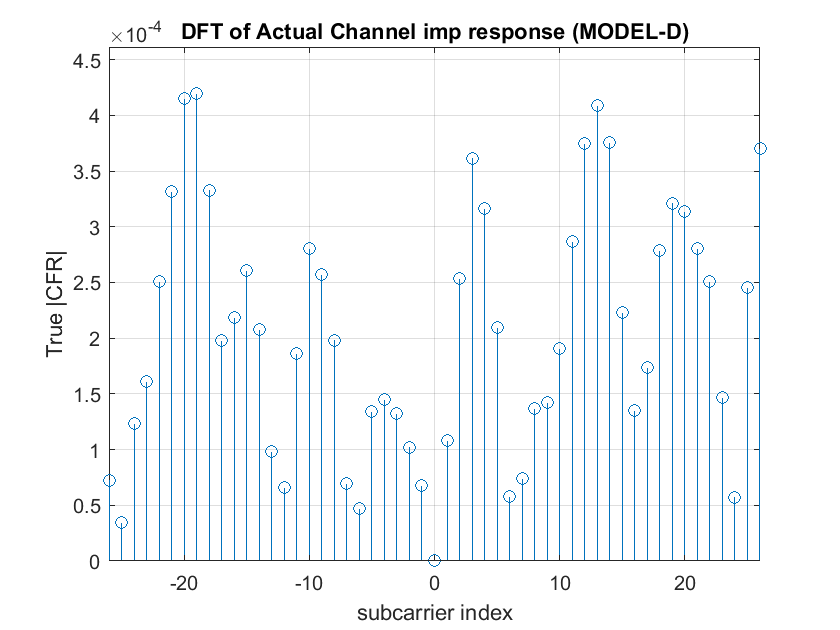

In [29]:
H_K_from_impr=fftshift(fft((impr),64));%%% impr is the actual h(n) of delay profile Model 'D'
%%% first take fft and then do fft shift. 

H_K_from_impr=H_K_from_impr.';
H_K_from_impr=[H_K_from_impr(7:32) zeros(1,1) H_K_from_impr(34:59)];
% null subcarrier index are vomited
figure(4)
kk=[-26:26];                                                                                                                 
stem(kk,abs(H_K_from_impr));                                                                                                 
M2=1.1*max(abs(H_K_from_impr));
axis([-26 26 0 M2]);
grid on;
xlabel('subcarrier index');
ylabel('True |CFR|');
title('DFT of Actual Channel imp response (MODEL-D)');

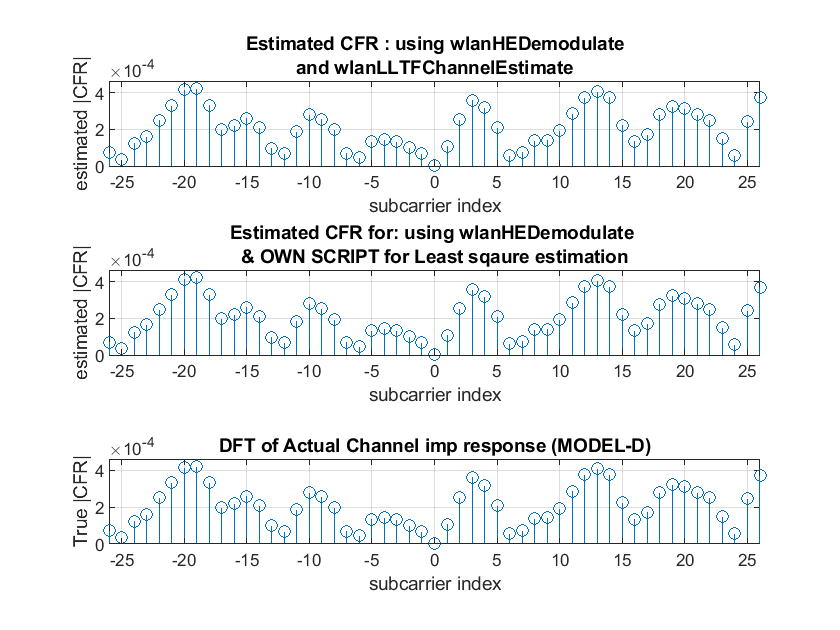

In [32]:
%%%%ESTIMATION of CHANNEL EVERY SUB-CARRIER using wlan L-LTF Channel Estimate
figure(5)
subplot(3,1,1)
est = wlanLLTFChannelEstimate(lltfDemod,chanBW);
est=[est(1:26).' zeros(1,1) est(27:52).'];
kk=[-26:26];
stem(kk,abs(est));
M1=max(abs(est))+0.1*max(abs(est));
axis([-26 26 0 M1]);grid on;
xlabel('subcarrier index');
ylabel('estimated |CFR|');
title("Estimated CFR : using wlanHEDemodulate"+ newline  + "and wlanLLTFChannelEstimate")

subplot(3,1,2)
stem(kk,abs(estimated_hk));
M1=1.1*max(abs(estimated_hk));
axis([-26 26 0 M1]);
grid on; title("Estimated CFR for: using wlanHEDemodulate " + newline  + "& OWN SCRIPT for Least sqaure estimation")
xlabel('subcarrier index');
ylabel('estimated |CFR|');


subplot(3,1,3);
stem(kk,abs(H_K_from_impr)); % true Hk computed from actual Channel impulse response(9 tap filter coefficients) of MODEL B'
M2=1.1*max(abs(H_K_from_impr));
axis([-26 26 0 M2]);
grid on;
xlabel('subcarrier index');
ylabel('True |CFR|');
title('DFT of Actual Channel imp response (MODEL-D)');



**Displays data and pilot indices**

In [33]:
info = wlanHEOFDMInfo('L-LTF',cfgSU);
data = LLTF_BPSK(info.DataIndices,:,:); 
data_tones=data'
 pilots = LLTF_BPSK(info.PilotIndices,:,:);info = wlanHEOFDMInfo('L-LTF',cfgSU); 
pilot_tones=pilots'


data_tones = 1x48 double
     0     0     0     0     0     1     1    -1    -1     1     1    -1     1    -1     1     1     1     1     1    -1    -1     1     1    -1     1    -1     1     1     1     1
...

pilot_tones = 1x4 double
     0     1     0    -1